# BIG DATA ANALYTICS COURSE
# QUIZ 1 
### Pablo Alvarez

This is independent work and will count toward your final grade.

Instructions: Open `Challenge-Exercise-1-dataset.csv` in a Jupyter Notebook and answer the questions in this quiz.

 

To get started:

1. Import the following modules:
import numpy as np
import pandas as pd

2. Read in the dataset using:
df = pd.read_csv(\path\'Challenge-Exercise-1-dataset.csv')

3. Inspect the DataFrame using:
#display first 5 packets in DataFrame
df.head()

In [1]:
import numpy as np
import pandas as pd

# Read in the dataset
df = pd.read_csv('Challenge-Exercise-1-dataset.csv')
df.head(5)

,No.,Time,Protocol,Source,Destination,Length,Info
0,1,0.000000,ARP,00:0c:29:7b:a8:da,ff:ff:ff:ff:ff:ff,42,Who has 172.16.253.254? Tell 172.16.253.129
1,2,0.000193,ARP,00:50:56:e7:50:95,00:0c:29:7b:a8:da,60,172.16.253.254 is at 00:50:56:e7:50:95
2,3,0.000204,DHCP,00:0c:29:7b:a8:da,00:50:56:e7:50:95,343,DHCP Request - Transaction ID 0xa379aeca
3,4,0.001525,DHCP,00:50:56:e7:50:95,00:0c:29:7b:a8:da,342,DHCP ACK - Transaction ID 0xa379aeca
4,5,16.384615,IGMPv3,00:0c:29:7b:a8:da,01:00:5e:00:00:16,54,Membership Report / Leave group 239.255.255.250


#### 1. How many attributes are contained in this dataset?
We can loot at the dimendions of the dataset: there are 7 atributes

In [3]:
# show dimensions
print("Dimensions: {}".format(df.shape))

Dimensions: (769, 7)


#### 2. How many elements are contained in the dataset?
the dataset contains 769 elements

In [56]:
# show dimensions
print("Dimensions: {}".format(df.shape))

Dimensions: (769, 7)


#### 3. What is the largest packet size (in bytes) contained in the dataset?

In [174]:
df['Length'].max()

1109

#### 4. How many packets have a length of 60 bytes?
We can filter the dataframe, selecting only those elements with the 'length' atribute equals 60. That gives us 256 elements

In [35]:
df2 =df[df['Length']==60]

#visual check of the selection
df2.head(10)

,No.,Time,Protocol,Source,Destination,Length,Info
1,2,0.000193,ARP,00:50:56:e7:50:95,00:0c:29:7b:a8:da,60,172.16.253.254 is at 00:50:56:e7:50:95
21,22,136.082334,ARP,00:50:56:f2:7a:09,00:0c:29:7b:a8:da,60,172.16.253.2 is at 00:50:56:f2:7a:09
27,28,136.671748,TCP,00:50:56:f2:7a:09,00:0c:29:7b:a8:da,60,"80 > 1044 [SYN, ACK] Seq=0 Ack=1 Win=64240 L..."
30,31,136.672135,TCP,00:50:56:f2:7a:09,00:0c:29:7b:a8:da,60,80 > 1044 [ACK] Seq=1 Ack=14 Win=64240 Len=0
33,34,138.849578,TCP,00:50:56:f2:7a:09,00:0c:29:7b:a8:da,60,80 > 1044 [ACK] Seq=1056 Ack=45 Win=64240 Len=0
34,35,141.317058,TCP,00:50:56:f2:7a:09,00:0c:29:7b:a8:da,60,"80 > 1070 [RST, ACK] Seq=1 Ack=1 Win=64240 L..."
37,38,143.143056,TCP,00:50:56:f2:7a:09,00:0c:29:7b:a8:da,60,80 > 1044 [ACK] Seq=2111 Ack=76 Win=64240 Len=0
40,41,143.650441,TCP,00:50:56:f2:7a:09,00:0c:29:7b:a8:da,60,80 > 1044 [ACK] Seq=3166 Ack=107 Win=64240 L...
43,44,144.069816,TCP,00:50:56:f2:7a:09,00:0c:29:7b:a8:da,60,80 > 1044 [ACK] Seq=4221 Ack=138 Win=64240 L...
46,47,144.623677,TCP,00:50:56:f2:7a:09,00:0c:29:7b:a8:da,60,80 > 1044 [ACK] Seq=5276 Ack=169 Win=64240 L...


In [27]:
# we get the dimention of the selection
print("Dimensions: {}".format(df2.shape))

Dimensions: (256, 7)


#### 5. Compute the delay between successive packets in the dataset. What is the average inter-packet delay (in seconds)?
To do this We can create a new list (delays) and iterate along the dataframe for the attribute 'time', grabing the time value of a record minus the time value of the previous one.
Each of these substractions is stored on the list 'delays' and then, the mean in computed using numpy.mean() function
we also previoulsy check whether there were any NaN values in the dataset

In [2]:
delays = []
for i in range(1, 769):
    delays.append(df['Time'][i]-df['Time'][i-1])
print(np.mean(delays))

0.73131450390625


A more elegaln way using diff() function: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.diff.html

In [3]:
df.Time.diff().mean()

0.73131450390625

We can visualize the diferences (delays) to check whether the answer makes sense

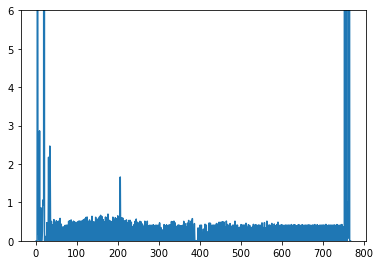

In [180]:
import matplotlib.pyplot as plt
a= plt.figure()
axes= a.add_axes([0.1,0.1,0.8,0.8])
axes.set_ylim([0,6])
axes.plot(range(1,769), delays)
plt.show()

In [158]:
np.max(delays)

130.873256

#### 6. Count the number of ARP packets that are present in the trace. How many are there?
Similarly to question 4, we select those elements whose 'Protocol' is ARP. It gives us 18 elements

In [175]:
df3 =df[df['Protocol']=='ARP']

#visual check of the selection
df3.head(5)

,No.,Time,Protocol,Source,Destination,Length,Info
0,1,0.000000,ARP,00:0c:29:7b:a8:da,ff:ff:ff:ff:ff:ff,42,Who has 172.16.253.254? Tell 172.16.253.129
1,2,0.000193,ARP,00:50:56:e7:50:95,00:0c:29:7b:a8:da,60,172.16.253.254 is at 00:50:56:e7:50:95
15,16,21.722586,ARP,00:0c:29:7b:a8:da,ff:ff:ff:ff:ff:ff,42,Gratuitous ARP for 172.16.253.129 (Request)
16,17,21.977150,ARP,00:0c:29:7b:a8:da,ff:ff:ff:ff:ff:ff,42,Gratuitous ARP for 172.16.253.129 (Request)
17,18,22.978029,ARP,00:0c:29:7b:a8:da,ff:ff:ff:ff:ff:ff,42,Gratuitous ARP for 172.16.253.129 (Request)


In [176]:
# we get the dimensions of the new dataframe
df3.shape

(18, 7)

Another way using the unique values and value_counts() method

In [128]:
# we check the possible elements. There is no mispelling
df['Protocol'].unique()

array(['ARP', 'DHCP', 'IGMPv3', 'ICMP', 'DNS', 'TCP'], dtype=object)

In [4]:
# we then count those whose 'Protocol' valueis 'ARP'
df['Protocol'].value_counts()#['ARP']

TCP       726
ARP        18
DHCP       10
IGMPv3      7
ICMP        4
DNS         4
Name: Protocol, dtype: int64

#### 7. In this packet trace, how many TCP packets have a length that is less than or equal to 60 bytes?
In this case we have to make a double selection: elements have to have 'protocol' = TCP and length must be less than or equal to 60. It gives us 253 elements

In [165]:
df4 = df[(df['Length']<=60) & (df['Protocol']=='TCP')]
df4.shape

(253, 7)

In [167]:
# visual check of the selection
df4.head(5)

,No.,Time,Protocol,Source,Destination,Length,Info
27,28,136.671748,TCP,00:50:56:f2:7a:09,00:0c:29:7b:a8:da,60,"80 > 1044 [SYN, ACK] Seq=0 Ack=1 Win=64240 L..."
28,29,136.671825,TCP,00:0c:29:7b:a8:da,00:50:56:f2:7a:09,54,1044 > 80 [ACK] Seq=1 Ack=1 Win=64240 Len=0
30,31,136.672135,TCP,00:50:56:f2:7a:09,00:0c:29:7b:a8:da,60,80 > 1044 [ACK] Seq=1 Ack=14 Win=64240 Len=0
33,34,138.849578,TCP,00:50:56:f2:7a:09,00:0c:29:7b:a8:da,60,80 > 1044 [ACK] Seq=1056 Ack=45 Win=64240 Len=0
34,35,141.317058,TCP,00:50:56:f2:7a:09,00:0c:29:7b:a8:da,60,"80 > 1070 [RST, ACK] Seq=1 Ack=1 Win=64240 L..."


#### 8. Of those TCP packets that are less than or equal to 60 bytes, how many have the FIN and ACK bits set?
For this question we can use the str.contains function that checkes whether the words 'FIN, ACK' are included in the Info atribute

In [178]:
df5 = df4[df['Info'].str.contains("FIN, ACK")]

#visual check. There are only 2 elements
df5.head(3)

C:\Users\UACIS\AppData\Local\Temp/ipykernel_22824/427259458.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df5 = df4[df['Info'].str.contains("FIN, ACK")]


,No.,Time,Protocol,Source,Destination,Length,Info
383,384,201.273855,TCP,00:0c:29:7b:a8:da,00:50:56:f2:7a:09,54,"1044 > 80 [FIN, ACK] Seq=3610 Ack=122412 Win..."
751,752,250.434251,TCP,00:0c:29:7b:a8:da,00:50:56:f2:7a:09,54,"1046 > 80 [FIN, ACK] Seq=3610 Ack=122412 Win..."


In [89]:
df5.shape

(2, 7)

#### 9. If a packet contains either an ICMP or IGMPv3 packet, annotate a new column with a 1 to indicate present and 0 otherwise. Determine the number of packets that are flagged with a 1.
One approach is to create the new column with a boolean series that is the result of checking whether the common patter of ICMP and IGMPv3 ('MP') is present in the atribute 'Protocol'

In [10]:
# wew use the assign method to create the column

#df6=df.assign(ICMP=df['Protocol'].str.contains("MP") )
df6=df.assign(ICMP=((df['Protocol']=='ICMP' ) | (df['Protocol']=='IGMPv3')))

In [11]:
# visual sanity check
df6.head(20)

,No.,Time,Protocol,Source,Destination,Length,Info,ICMP
0,1,0.000000,ARP,00:0c:29:7b:a8:da,ff:ff:ff:ff:ff:ff,42,Who has 172.16.253.254? Tell 172.16.253.129,False
1,2,0.000193,ARP,00:50:56:e7:50:95,00:0c:29:7b:a8:da,60,172.16.253.254 is at 00:50:56:e7:50:95,False
2,3,0.000204,DHCP,00:0c:29:7b:a8:da,00:50:56:e7:50:95,343,DHCP Request - Transaction ID 0xa379aeca,False
3,4,0.001525,DHCP,00:50:56:e7:50:95,00:0c:29:7b:a8:da,342,DHCP ACK - Transaction ID 0xa379aeca,False
4,5,16.384615,IGMPv3,00:0c:29:7b:a8:da,01:00:5e:00:00:16,54,Membership Report / Leave group 239.255.255.250,True
5,6,16.571901,IGMPv3,00:0c:29:7b:a8:da,01:00:5e:00:00:16,54,Membership Report / Join group 239.255.255.250...,True
6,7,17.406632,IGMPv3,00:0c:29:7b:a8:da,01:00:5e:00:00:16,54,Membership Report / Leave group 239.255.255.250,True
7,8,17.423735,IGMPv3,00:0c:29:7b:a8:da,01:00:5e:00:00:16,54,Membership Report / Join group 239.255.255.250...,True
8,9,17.977730,IGMPv3,00:0c:29:7b:a8:da,01:00:5e:00:00:16,54,Membership Report / Join group 239.255.255.250...,True
9,10,20.841272,DHCP,00:0c:29:7b:a8:da,ff:ff:ff:ff:ff:ff,342,DHCP Discover - Transaction ID 0x171ae510,False


In [105]:
# we compute the sum of Trues
df6['ICMP'].sum()

11

Another way using the sum of two boolean series

In [124]:
a = df['Protocol'].str.contains("ICMP")
b = df['Protocol'].str.contains("IGMPv3")
df7 = df.assign(ICMP= a + b )
df7['ICMP'].sum()

11

and another way Using the isin() method for filtering

In [127]:
df8 = df[df['Protocol'].isin(["ICMP" , "IGMPv3"])]
df8.shape

(11, 7)